In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


1.	**Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.
Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.
Answer: Hybrid**


In [2]:
taxi_owners=pd.read_pickle("taxi_owners.p")

taxi_veh=pd.read_pickle("taxi_vehicles.p")

In [162]:
print(taxi_owners.value_counts(),"\n\n")
print(taxi_veh.value_counts())

rid    vid   owner                          address                zip  
T1     1     YC1 LLC                        3351 W. ADDISON ST.    60618    1
T5162  5162  VERONIQUE ARIELLE CAB CORP.    2617 S. WABASH AVE.    60616    1
T5140  5140  IRA C BERGER                   6311 N. LAWNDALE AVE.  60659    1
T5145  5145  HHH & I COMPANY                3351 W. ADDISON ST.    60618    1
T5146  5146  AMR CAB CORP.                  3351 W. ADDISON AVE.   60618    1
                                                                           ..
T3015  3015  TANAKA TRANS CORP.             4626 W. CORNELIA AVE.  60641    1
T3016  3016  DRAKE GLOBAL ENTERPRISES INC.  2945 W. PETERSON AVE.  60659    1
T3018  3018  DERLY'S CAB CO., INC.          4626 W. CORNELIA AVE.  60641    1
T3019  3019  HERETIC INC                    3351 W. ADDISON ST.    60618    1
T997   997   PLAYING POLO IN CHICAGO INC    2617 S. WABASH AVE.    60616    1
Length: 3519, dtype: int64 


vid   make    model   year  fuel_type  

In [3]:
taxi_own_veh=taxi_veh.merge(taxi_owners,on="vid")
print(taxi_own_veh.head())
print("\n\n===================================================\n\n")
print(taxi_own_veh.columns)   #note that there is two duplicate coulmn --owner_x and owner_y

    vid    make   model  year fuel_type              owner_x    rid  \
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI  T2767   
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.  T1411   
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP  T6500   
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC  T2746   
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO  T5922   

               owner_y                address    zip  
0       SEYED M. BADRI    510 W. BELMONT AVE.  60657  
1          DESZY CORP.    3351 W. ADDISON ST.  60618  
2       AGAPH CAB CORP  2945 W. PETERSON AVE.  60659  
3  MIDWEST CAB CO, INC  4020 W. GLENLAKE AVE.  60646  
4       SUMETTI CAB CO      6550 N. CLARK ST.  60626  




Index(['vid', 'make', 'model', 'year', 'fuel_type', 'owner_x', 'rid',
       'owner_y', 'address', 'zip'],
      dtype='object')


In [4]:
taxi_own_veh=taxi_veh.merge(taxi_owners,on="vid",suffixes=("_own","_veh"))
print(taxi_own_veh.head())

    vid    make   model  year fuel_type            owner_own    rid  \
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI  T2767   
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.  T1411   
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP  T6500   
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC  T2746   
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO  T5922   

             owner_veh                address    zip  
0       SEYED M. BADRI    510 W. BELMONT AVE.  60657  
1          DESZY CORP.    3351 W. ADDISON ST.  60618  
2       AGAPH CAB CORP  2945 W. PETERSON AVE.  60659  
3  MIDWEST CAB CO, INC  4020 W. GLENLAKE AVE.  60646  
4       SUMETTI CAB CO      6550 N. CLARK ST.  60626  


In [5]:
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64




---

2.	**Wards_Offices_Altered.csv is available which contains only 46 wards. Load this .csv to wards_altered and merge it with census on the column ward. Save the result to wards_census_altered and observe the number of rows.**





In [7]:
wards=pd.read_csv("Wards_Offices_Altered.csv")
cenus=pd.read_csv("Wards_Census.csv")
print(wards.shape)
print(cenus.shape)

(46, 4)
(50, 6)


In [13]:
print(wards.head())

   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649


In [15]:
print(cenus.head())

   ward  pop_2000  pop_2010 change                                  address  \
0     1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1     2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2     3     40385     53039    31%                      17 EAST 38TH STREET   
3     4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4     5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  


In [16]:
wards_cenus=wards.merge(cenus,on="ward")
print(wards_cenus.head())
print("=============Total number of rows and columns in wards cenus =",wards_cenus.shape,"=============")

   ward            alderman                        address_x  zip_x  pop_2000  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  
=============Total number of rows and columns in wards cenus = (46, 9) =============


In [17]:
wards_cenus_altered=cenus.merge(wards,on="ward")
print(wards_cenus_altered.head())
print("=============Total number of rows and columns in wards cenus =",wards_cenus_altered.shape,"=============")

   ward  pop_2000  pop_2010 change                                address_x  \
0     1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1     2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2     3     40385     53039    31%                      17 EAST 38TH STREET   
3     4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4     5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

   zip_x            alderman                        address_y  zip_y  
0  60647  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647  
1  60622       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622  
2  60653          Pat Dowell          5046 SOUTH STATE STREET  60609  
3  60653    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616  
4  60637  Leslie A. Hairston            2325 EAST 71ST STREET  60649  
=============Total number of rows and columns in wards cenus = (46, 9) =============




---



---



In [18]:
lincenses=pd.read_csv("Business_Licenses.csv")
print( lincenses.head())
print(lincenses.shape)

   account  ward  aid                   business               address  \
0   307071     3  743       REGGIE'S BAR & GRILL       2105 S STATE ST   
1       10    10  829                 HONEYBEERS   13200 S HOUSTON AVE   
2    10002    14  775                CELINA DELI     5089 S ARCHER AVE   
3    10005    12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST   
4    10044    44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE   

       zip  
0  60616.0  
1  60633.0  
2  60632.0  
3  60609.0  
4  60613.0  
(10000, 6)


In [19]:
ward_lincenses=wards.merge(lincenses,on="ward",suffixes=("_ward","_lic"))
print(ward_lincenses)

      ward            alderman                address_ward  zip_ward  account  \
0        1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE     60647    12024   
1        1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE     60647    14446   
2        1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE     60647    14624   
3        1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE     60647    14987   
4        1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE     60647    15642   
...    ...                 ...                         ...       ...      ...   
9285    46     James Cappleman  4544 NORTH BROADWAY AVENUE     60640    64787   
9286    46     James Cappleman  4544 NORTH BROADWAY AVENUE     60640     6764   
9287    46     James Cappleman  4544 NORTH BROADWAY AVENUE     60640     6787   
9288    46     James Cappleman  4544 NORTH BROADWAY AVENUE     60640     8329   
9289    46     James Cappleman  4544 NORTH BROADWAY AVENUE     60640     8612   

      aid                  

3.	**Complete the following tasks.
•	Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
•	Group licenses_owners by title and count the number of accounts for each title using .agg({'account':'count'}). Save the result as counted_df
•	Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
•	Use the .head() method to print the first few rows of the sorted_df.**


In [20]:
biz_owners=pd.read_pickle("business_owners.p")
lincenses=pd.read_pickle("licenses.p")
print(biz_owners)
print(lincenses)

      account first_name  last_name           title
0          10      PEARL    SHERMAN       PRESIDENT
1          10      PEARL    SHERMAN       SECRETARY
2       10002     WALTER     MROZEK         PARTNER
3       10002     CELINA     BYRDAK         PARTNER
4       10005      IRENE  ROSENFELD       PRESIDENT
...       ...        ...        ...             ...
21347    9513     THOMAS     MAHLUM       SECRETARY
21348    9563  GUADALUPE      PEREZ       PRESIDENT
21349    9638     STEVEN     JENSEN  VICE PRESIDENT
21350    9922     MANUEL    SALAZAR       SECRETARY
21351    9933    MICHAEL       KNAB       PRESIDENT

[21352 rows x 4 columns]
     account ward  aid                   business                     address  \
0     307071    3  743       REGGIE'S BAR & GRILL             2105 S STATE ST   
1         10   10  829                 HONEYBEERS         13200 S HOUSTON AVE   
2      10002   14  775                CELINA DELI           5089 S ARCHER AVE   
3      10005   12  NaN  KR

In [21]:
lincenses_onwers=lincenses.merge(biz_owners,on="account")

In [22]:
counted_df=lincenses_onwers.groupby("title").agg({"account":"count"})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [23]:
sorted_df=counted_df.sort_values("account",ascending=False)
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970




---



4.	**Complete the following tasks.
•	Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal.
•	Extend the previous merge to three tables by also merging the stations table.
•	Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.**


In [24]:
cal=pd.read_pickle("cta_calendar.p")
ridership=pd.read_pickle("cta_ridership.p")
stations=pd.read_pickle("stations.p")

In [25]:
print(cal.head())
print(ridership.head())
print(stations.head())

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


In [26]:
#ridership_cal=ridership.merge(cal)

#merging the ridersip ,cal and stations tables
ridership_cal_stations=ridership.merge(cal,on=["year","month","day"]).merge(stations)
print(ridership_cal_stations)

     station_id  year  month  day  rides        day_type        station_name  \
0         40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1         40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2         40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3         40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4         40010  2019      1    5    719        Saturday  Austin-Forest Park   
...         ...   ...    ...  ...    ...             ...                 ...   
3280      41660  2019     12   27  13898         Weekday          Lake/State   
3281      41660  2019     12   28   9485        Saturday          Lake/State   
3282      41660  2019     12   29   7581  Sunday/Holiday          Lake/State   
3283      41660  2019     12   30  15332         Weekday          Lake/State   
3284      41660  2019     12   31  13430         Weekday          Lake/State   

                     location  
0     (

In [178]:

ridership_cal_stations=ridership.merge(cal,on=["year","month","day"]).merge(stations,on="station_id")
print(ridership_cal_stations)

     station_id  year  month  day  rides        day_type        station_name  \
0         40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1         40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2         40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3         40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4         40010  2019      1    5    719        Saturday  Austin-Forest Park   
...         ...   ...    ...  ...    ...             ...                 ...   
3280      41660  2019     12   27  13898         Weekday          Lake/State   
3281      41660  2019     12   28   9485        Saturday          Lake/State   
3282      41660  2019     12   29   7581  Sunday/Holiday          Lake/State   
3283      41660  2019     12   30  15332         Weekday          Lake/State   
3284      41660  2019     12   31  13430         Weekday          Lake/State   

                     location  
0     (

In [179]:
filter_criteria=((ridership_cal_stations["month"]==7)
                  &(ridership_cal_stations["day_type"]=="Weekday")
                  &(ridership_cal_stations["station_name"]=="Wilson"))
##############caution########################case / name senstitice
print(ridership_cal_stations.loc[filter_criteria,"rides"].sum())

140005


5.	**Complete the following tasks.
•	Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
•	Group the results of the three merged tables by the column alderman and find the median income (agg({'income':'median'}).**


In [28]:
lincenses=pd.read_pickle("licenses.p")
wards=pd.read_pickle("ward.p")
zip_demo=pd.read_pickle("zip_demo.p")


In [29]:
print(lincenses.head())
print(wards.head())
print(zip_demo.head())

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226


In [30]:
lincenses_zip_wards=lincenses.merge(zip_demo,on="zip").merge(wards,on="ward")
print(lincenses_zip_wards)

     account ward  aid                   business                address_x  \
0     307071    3  743       REGGIE'S BAR & GRILL          2105 S STATE ST   
1      11280    3  763                  PRIME WAY      2251 S STATE ST 1ST   
2      15015    3  NaN      SOUTHVIEW MANOR, INC.      3311 S MICHIGAN AVE   
3      19168    3  666                   BP AMOCO  3101 S MICHIGAN AVE 1ST   
4     205980    3  763      J & J  FISH & CHICKEN            8 E CERMAK RD   
...      ...  ...  ...                        ...                      ...   
9989  278535   18  NaN       LOOP DEVELOPMENT PTR           3135 W 71ST ST   
9990   35801   18  NaN    MOTHER'S TOUCH DAY CARE       2501 W 71ST ST 1ST   
9991  395464   18  894      Brother's Barber Shop         2445 W 71ST ST 1   
9992   42012   18  NaN               WINSTON LOTT       2957 W 71ST ST 1ST   
9993   85634   18  NaN  KIDS "R" US OUTLET CENTER     7455 S CICERO AVE  1   

      zip_x  income           alderman                address_y

In [31]:
lincenses_zip_wards["alderman"]


0              Pat Dowell
1              Pat Dowell
2              Pat Dowell
3              Pat Dowell
4              Pat Dowell
              ...        
9989    Derrick G. Curtis
9990    Derrick G. Curtis
9991    Derrick G. Curtis
9992    Derrick G. Curtis
9993    Derrick G. Curtis
Name: alderman, Length: 9994, dtype: object

6.	**Complete the following tasks.
•	What column is likely the best column to merge the two tables on?
•	Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
•	Count the number of rows in movies_financials with a null value in the budget column**

In [33]:
movies=pd.read_pickle("movies.p")
finicials=pd.read_pickle("financials.p")
print(movies.head())
print(finicials.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [34]:
movies_finicial=movies.merge(finicials,on="id",how="left")
#merging movies and finicials with a left join
print(movies_finicial)

         id                 title  popularity release_date      budget  \
0       257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1     14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   
2     38365             Grown Ups   38.864027   2010-06-24  80000000.0   
3      9672              Infamous    3.680896   2006-11-16  13000000.0   
4     12819       Alpha and Omega   12.300789   2010-09-17  20000000.0   
...     ...                   ...         ...          ...         ...   
4798   3089             Red River    5.344815   1948-08-26   3000000.0   
4799  11934   The Hudsucker Proxy   14.188982   1994-03-11         NaN   
4800  13807                Exiled    8.486390   2006-09-06         NaN   
4801  73873          Albert Nobbs    7.802245   2011-12-21   8000000.0   
4802  11622   Blast from the Past    8.737058   1999-02-12  35000000.0   

          revenue  
0      42093706.0  
1             NaN  
2     271430189.0  
3       1151330.0  
4      3930

In [35]:
number_of_missing_vals=movies_finicial["budget"].isna().sum()
print(number_of_missing_vals)

1574


# Right Join

In [37]:
movie_to_genres = pd.read_pickle("movie_to_genres.p")
movie_to_genres.to_csv("tdmb_to_genres.csv")
#merge from csv to p

In [38]:
movie_to_genres = pd.read_csv("tdmb_movie_to_genres.csv")
tv_genre = movie_to_genres[movie_to_genres['genre'] =='TV Movie']
print(tv_genre)

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie


In [41]:
tv_movies = movies.merge(tv_genre,  how= "right", left_on="id", right_on= "movie_id")
print(tv_movies.head())

       id                      title  popularity release_date  movie_id  \
0   10947        High School Musical   16.536374   2006-01-20     10947   
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187   
2   22488         Love's Abiding Joy    1.128559   2006-10-06     22488   
3   78814       We Have Your Husband    0.102003   2011-11-12     78814   
4  153397                   Restless    0.812776   2012-12-07    153397   

      genre  
0  TV Movie  
1  TV Movie  
2  TV Movie  
3  TV Movie  
4  TV Movie  


# Outer Join

In [190]:
movie_to_genres.to_csv("tdmb_to_genres.csv")
m = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[m].head(3)
family

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [191]:
m = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[m].head(3)
comedy

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [42]:
family_comedy = family.merge(comedy, on='movie_id', how='outer', suffixes=('_fam', '_com'))
print(family_comedy)

NameError: name 'family' is not defined

# 8

In [43]:
movies=pd.read_pickle("movies.p")
movie_to_genres = pd.read_csv("tdmb_movie_to_genres.csv")


m = movie_to_genres['genre'] == 'Science Fiction'
scifi_movies = movie_to_genres[m]

m = movie_to_genres['genre'] == 'Action'
action_movies = movie_to_genres[m]


In [44]:
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))

scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

result = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')
result


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction
...,...,...,...,...,...,...,...
253,245703,Midnight Special,32.717853,2016-02-18,245703,NaN,Science Fiction
254,3509,A Scanner Darkly,26.093043,2006-05-25,3509,NaN,Science Fiction
255,42188,Never Let Me Go,30.983397,2010-09-15,42188,NaN,Science Fiction
256,18045,The Dark Hours,1.428483,2005-03-11,18045,NaN,Science Fiction


# Exercise 9

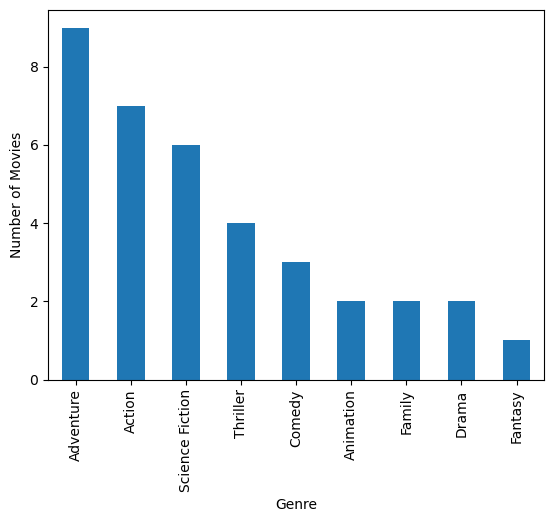

In [45]:
pop_movies = pd.read_csv("pop_movies.csv")
movie_to_genres = pd.read_csv("tdmb_movie_to_genres.csv")
genres_movies = movie_to_genres.merge(pop_movies, left_on='movie_id',right_on='id', how='right')
genre_counts = genres_movies['genre'].value_counts()
genres_movies.groupby('genre').agg({'id':'count'})
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [46]:
sequel=pd.read_pickle("sequels.p")
print(sequel.head())

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>


In [53]:
original_sequels = sequel.merge(sequel, left_on = 'sequel', right_on='id', suffixes=('_org', '_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [54]:
print(original_sequels[['title_org', 'title_seq']].head())


                                           title_org  \
0                                          Toy Story   
1                                        Toy Story 2   
2          Harry Potter and the Order of the Phoenix   
3              The Lord of the Rings: The Two Towers   
4  The Lord of the Rings: The Fellowship of the Ring   

                                       title_seq  
0                                    Toy Story 2  
1                                    Toy Story 3  
2         Harry Potter and the Half-Blood Prince  
3  The Lord of the Rings: The Return of the King  
4          The Lord of the Rings: The Two Towers  


In [55]:
original_sequels = sequel.merge(sequel, left_on="sequel", right_on='id',how='left', suffixes=('_org','_seq'))
original_sequels

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...
4798,133931,Zambezia,<NA>,<NA>,NaN,<NA>
4799,309503,Zipper,<NA>,<NA>,NaN,<NA>
4800,34592,ZMD: Zombies of Mass Destruction,<NA>,<NA>,NaN,<NA>
4801,206213,Zombie Hunter,<NA>,<NA>,NaN,<NA>


# Exercise 10

In [56]:

crews = pd.read_pickle('crews.p')

crews_self_merged = pd.merge(crews, crews, on='id', how='inner', suffixes=('_dir', '_crew'))

boolean_filter = (
    (crews_self_merged['job_dir'] == 'Director') &
    (crews_self_merged['job_crew'] != 'Director')
)

direct_crews = crews_self_merged[boolean_filter]

direct_crews.head()


,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


# Concatenate DataFrame Together Vertically.

# EXERCISE 11

In [57]:
import pandas as pd

tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

concatenated_with_sort = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)

concatenated_reset_index = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True)

concatenated_common_columns = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner')

print("Concatenated with Sorting:")
print(concatenated_with_sort.head())

print("\nConcatenated with Reset Index:")
print(concatenated_reset_index.head())

print("\nConcatenated with Common Columns:")
print(concatenated_common_columns.head())


Concatenated with Sorting:
   aid             composer  gid  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1               Battery  1853     0.99
1  152            K.Hammett    3     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1     Disposable Heroes  1857     0.99
0  154                  NaN    3     1  Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1    Ride The Lightning  1875     0.99

Concatenated with Reset Index:
    tid                  name  aid  mtid  gid             composer  u_price
0  1853               Battery  152     1    3  J.Hetfield/L.Ulrich     0.99
1  1854     Master Of Puppets  152     1    3            K.Hammett     0.99
2  1857     Disposable Heroes  152     1    3  J.Hetfield/L.Ulrich     0.99
3  1874  Fight Fire With Fire  154     1    3                  NaN     0.99
4  1875    Ride The Lightning  154     1    3                  NaN     0.99

Concatenated with Common Col

# EXERCISE 12

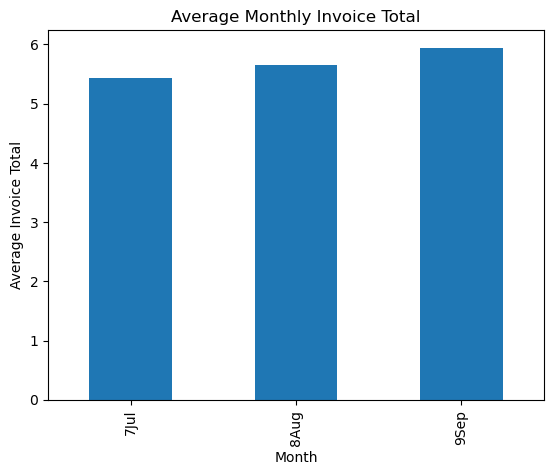

In [135]:
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

avg_inv_by_month = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])

average_inv_by_month = avg_inv_by_month.groupby(level=0)['total'].agg('mean')
average_inv_by_month.plot(kind='bar')
plt.title('Average Monthly Invoice Total')
plt.xlabel('Month')
plt.ylabel('Average Invoice Total')
plt.show()


# EXERCISE 13

In [158]:
gdp = pd.read_csv('GDP.csv')
sp500 = pd.read_csv('S&P500.csv')

gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left')
gdp_sp500[gdp_sp500['year'] == 2018]
print(gdp_sp500[gdp_sp500['year'] == 2018])


   Unnamed: 0 country code  year           gdp  date  returns
9          39          USA  2018  2.050000e+13   NaN      NaN


In [159]:

gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left', fill_method='ffill')

gdp_returns = gdp_sp500[['gdp', 'returns']]

correlation_matrix = gdp_returns.corr()
correlation_matrix


,gdp,returns
gdp,1.000000,0.220321
returns,0.220321,1.000000


# EXERCISE 14

       date      cpi     seriesid                  data_type  \
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  1/1/2015  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  1/1/2016  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  1/1/2017  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  1/1/2018  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  1/6/2014  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  1/6/2015  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  1/6/2016  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  1/6/2017  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  1/6/2018  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                5.6  
2                5.0  
3                4.7  
4                4.1  
5                6.1  
6                5.3  
7                4.9  
8                4.3  
9                4.0  


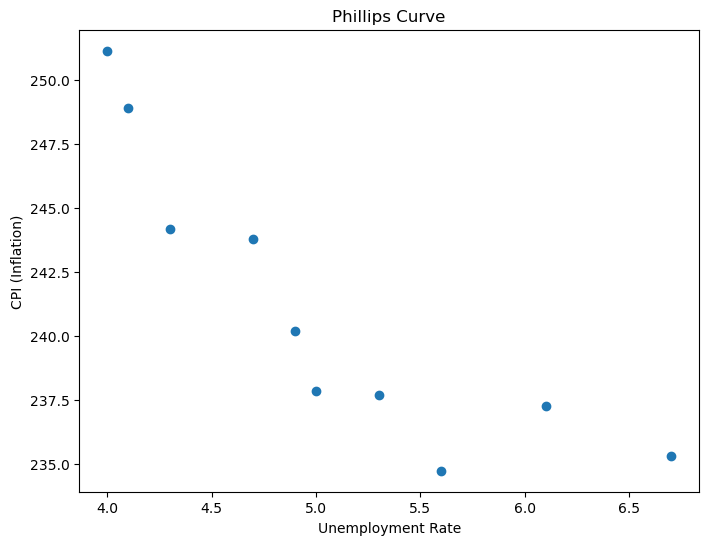

In [157]:
unemployment = pd.read_csv('unemployment.csv')
inflation = pd.read_csv('inflation.csv')

inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

print(inflation_unemploy)

plt.figure(figsize=(8, 6))
plt.scatter(inflation_unemploy['unemployment_rate'], inflation_unemploy['cpi'])
plt.title('Phillips Curve')
plt.xlabel('Unemployment Rate')
plt.ylabel('CPI (Inflation)')
plt.show()

